The data format of the sentinel 5p is NetCDF4. The file has two types group in which the group PORDUCT contains the info about lat, lon and methane mixing ratio(bias corrected)

methane_mixing_ratio: This is likely the actual measurement of methane concentration in the atmosphere at the specified location and time.

vs.

methane_mixing_ratio_bias_corrected: This represent a version of the methane mixing ratio that has been corrected for biases or errors, providing a more accurate representation of the true value.


naturalearth_lowres: This website has all the info about the geogrphical data of the whole world. The user input needs to be matched with the lat/long/name of this website



In [5]:
import netCDF4 as nc4
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt



#country_name = input("Enter the name of a country: ")

# Load the NetCDF dataset
Dataset = nc4.Dataset(r"C:\Users\User\Downloads\S5P_OFFL_L2__CH4____20230514T034638_20230514T052808_28925_03_020500_20230515T195331.nc")

print(Dataset)





<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7
    institution: KNMI/SRON
    source: Sentinel 5 precursor, TROPOMI, space-borne remote sensing, L2
    history: 2023-05-16 04:30:10 f_s5pops tropnll2dp /mnt/data1/storage_offl_l2/cache_offl_l2/WORKING-612033466/JobOrder.612033437.xml
    summary: TROPOMI/S5P Methane 1-Orbit L2 Swath 5.5x7.0km
    tracking_id: d54caa00-25f3-431c-b8b9-13f4f34ec317
    id: S5P_OFFL_L2__CH4____20230514T034638_20230514T052808_28925_03_020500_20230515T195331
    time_reference: 2023-05-14T00:00:00Z
    time_reference_days_since_1950: 26796
    time_reference_julian_day: 2460078.5
    time_reference_seconds_since_1970: 1684022400
    time_coverage_start: 2023-05-14T04:08:12Z
    time_coverage_end: 2023-05-14T05:06:36Z
    time_coverage_duration: PT3504.398S
    time_coverage_resolution: PT0.840S
    orbit: 28925
    references: https://sentinels.copernicus.eu/web/sentinel/technical-guides/sentinel-5

In [6]:
print(Dataset.groups)

{'PRODUCT': <class 'netCDF4._netCDF4.Group'>
group /PRODUCT:
    dimensions(sizes): scanline(4173), ground_pixel(215), corner(4), time(1), layer(12), level(13)
    variables(dimensions): int32 scanline(scanline), int32 ground_pixel(ground_pixel), int32 time(time), int32 corner(corner), int32 layer(layer), int32 level(level), int32 delta_time(time, scanline), <class 'str'> time_utc(time, scanline), uint8 qa_value(time, scanline, ground_pixel), float32 latitude(time, scanline, ground_pixel), float32 longitude(time, scanline, ground_pixel), float32 methane_mixing_ratio(time, scanline, ground_pixel), float32 methane_mixing_ratio_precision(time, scanline, ground_pixel), float32 methane_mixing_ratio_bias_corrected(time, scanline, ground_pixel)
    groups: SUPPORT_DATA, 'METADATA': <class 'netCDF4._netCDF4.Group'>
group /METADATA:
    dimensions(sizes): 
    variables(dimensions): 
    groups: QA_STATISTICS, ALGORITHM_SETTINGS, GRANULE_DESCRIPTION, ISO_METADATA, EOP_METADATA, ESA_METADATA}


In [7]:
Dataset.groups['PRODUCT'].variables.keys()

dict_keys(['scanline', 'ground_pixel', 'time', 'corner', 'layer', 'level', 'delta_time', 'time_utc', 'qa_value', 'latitude', 'longitude', 'methane_mixing_ratio', 'methane_mixing_ratio_precision', 'methane_mixing_ratio_bias_corrected'])

In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(world)

C:\Users\User\AppData\Local\Temp\ipykernel_8588\960280503.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


         pop_est      continent                      name iso_a3  gdp_md_est   
0       889953.0        Oceania                      Fiji    FJI        5496  \
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                       

In [24]:
lons = Dataset.groups['PRODUCT'].variables['longitude'][:][0, :, :]
lats = Dataset.groups['PRODUCT'].variables['latitude'][:][0, :, :]
methane = Dataset.groups['PRODUCT'].variables['methane_mixing_ratio_bias_corrected'][0, :, :]

print(lats)
print(lons)
print(methane)

subset_lons=lons[0:1]
subset_lats=lats[0:1]

print(subset_lons)

print(subset_lats) #???

[[-81.32951  -81.41167  -81.47737  ... -68.160934 -67.89871  -67.6216  ]
 [-81.28681  -81.36812  -81.433075 ... -68.14187  -67.87999  -67.60322 ]
 [-81.24404  -81.32451  -81.388725 ... -68.122734 -67.86119  -67.58477 ]
 ...
 [ 48.83609   48.95623   49.068466 ...  55.574165  55.631607  55.68979 ]
 [ 48.793053  48.913006  49.025063 ...  55.525955  55.58347   55.64173 ]
 [ 48.75002   48.86978   48.981663 ...  55.47783   55.53541   55.593754]]
[[ 114.13488   116.37989   118.54212  ... -151.60896  -151.17607
  -150.73065 ]
 [ 114.26701   116.50226   118.6545   ... -151.73373  -151.29976
  -150.8532  ]
 [ 114.39763   116.62317   118.7655   ... -151.85826  -151.42322
  -150.97551 ]
 ...
 [ -23.663729  -24.13542   -24.584703 ...  -60.65067   -61.164352
   -61.705837]
 [ -23.70316   -24.17455   -24.623543 ...  -60.652412  -61.16543
   -61.70621 ]
 [ -23.742666  -24.213749  -24.662443 ...  -60.654327  -61.16669
   -61.70678 ]]
[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -

In [25]:


lons = Dataset.groups['PRODUCT'].variables['longitude'][:][0, :, :]
lats = Dataset.groups['PRODUCT'].variables['latitude'][:][0, :, :]
methane = Dataset.groups['PRODUCT'].variables['methane_mixing_ratio_bias_corrected'][0, :, :]

print(lats)
print(lons)
print(methane)


lat = 55.631607
lon =55.68979




#gets the index of the lat and lon which have the minimum difference with the provided lat an lon

lat_idx = np.abs(lats - lat).argmin()   # calculates the difference of each value in the lats array and the provided lat and gets the absolute difference values array. 
lon_idx = np.abs(lons - lon).argmin()  #In its simplest use, the argmin function returns the index of the minimum value of a Numpy array.In other words, it finds the index of the value in the lats array that is closest to the user-provided lat.

print(lat_idx)
print(lon_idx)

# checks if the index is within the array
if lat_idx < len(lats) and lon_idx < len(lons):  #len(lat) grabs the total number values in the array
    methane_concentration = methane[lat_idx, lon_idx]
    print(f"Methane Concentration at Lat {lat}, Lon {lon}: {methane_concentration}")
else:
    print("Methane concentration not found for the provided lat and lon.")





[[-81.32951  -81.41167  -81.47737  ... -68.160934 -67.89871  -67.6216  ]
 [-81.28681  -81.36812  -81.433075 ... -68.14187  -67.87999  -67.60322 ]
 [-81.24404  -81.32451  -81.388725 ... -68.122734 -67.86119  -67.58477 ]
 ...
 [ 48.83609   48.95623   49.068466 ...  55.574165  55.631607  55.68979 ]
 [ 48.793053  48.913006  49.025063 ...  55.525955  55.58347   55.64173 ]
 [ 48.75002   48.86978   48.981663 ...  55.47783   55.53541   55.593754]]
[[ 114.13488   116.37989   118.54212  ... -151.60896  -151.17607
  -150.73065 ]
 [ 114.26701   116.50226   118.6545   ... -151.73373  -151.29976
  -150.8532  ]
 [ 114.39763   116.62317   118.7655   ... -151.85826  -151.42322
  -150.97551 ]
 ...
 [ -23.663729  -24.13542   -24.584703 ...  -60.65067   -61.164352
   -61.705837]
 [ -23.70316   -24.17455   -24.623543 ...  -60.652412  -61.16543
   -61.70621 ]
 [ -23.742666  -24.213749  -24.662443 ...  -60.654327  -61.16669
   -61.70678 ]]
[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -

C:\Users\User\AppData\Local\Temp\ipykernel_15964\4016996582.py:17: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh = ax.pcolormesh(lons, lats, methane, cmap='hot', shading='auto')


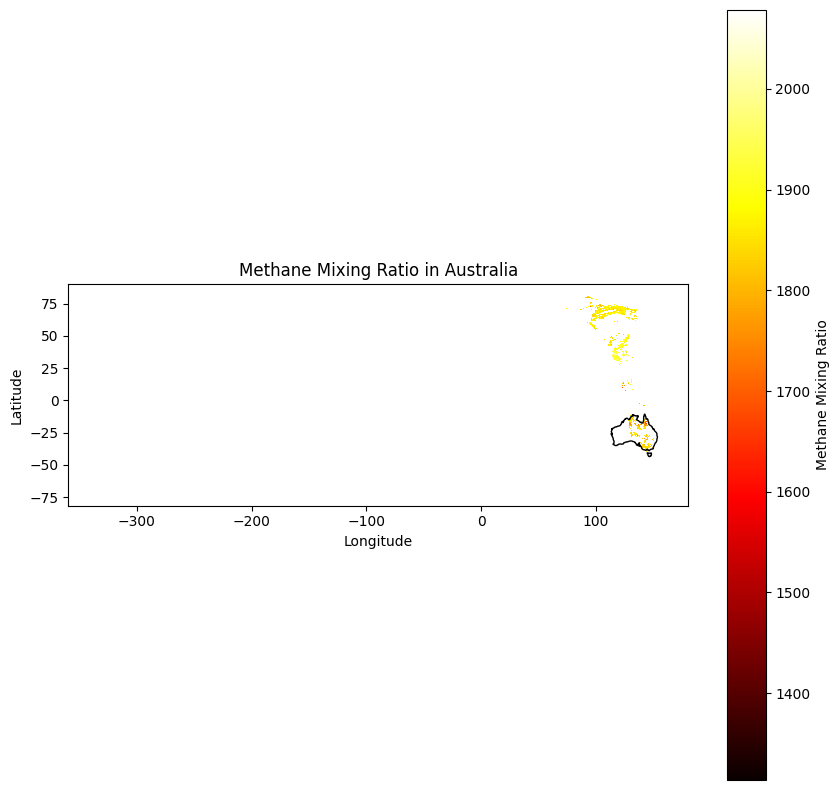

In [34]:
# Get user input for the country name
country_name = input("Enter the name of a country: ")

# Try to match the country name in the world DataFrame
matched_country = world[world['name'] == country_name]

# Check if a match is found
if not matched_country.empty:
    # Extract latitude, longitude, and methane mixing ratio data from the Dataset
    lons = Dataset.groups['PRODUCT'].variables['longitude'][0, :, :]
    lats = Dataset.groups['PRODUCT'].variables['latitude'][0, :, :]
    methane = Dataset.groups['PRODUCT'].variables['methane_mixing_ratio_bias_corrected'][0, :, :]

    # Plot the map
    fig, ax = plt.subplots(figsize=(10, 10))
    matched_country.boundary.plot(ax=ax, linewidth=1, color='black')
    mesh = ax.pcolormesh(lons, lats, methane, cmap='hot', shading='auto')
    cbar = plt.colorbar(mesh, ax=ax, label='Methane Mixing Ratio')
    ax.set_title(f'Methane Mixing Ratio in {country_name}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.show()
else:
    print("Country not found.")





